# Ejercicio 1

Resolviendo con el método SOR


para este método debemos considerar que:


$$\overline{U}_{i,j}^{iter+1} = -\frac{1}{4h^2 -2 -2\lambda^2}(U_{i-1,j}^{iter+1} + U_{i+1,j}^{iter} + \lambda^2(U_{i,j-1}^{iter+1} + U_{i,j+1}^{iter} ))$$
$$U_{i,j}^{iter+1} = (1-w)U_{i,j}^{iter} + w\overline{U}_{i,j}^{iter+1}$$

para $w\in [0,2]$ y tomando $nx=5$ y $ny=10$ ya que $h=0.2$ y $k=0.1$


Ahora definiendo nuestra función SOR para el ejercicio en Julia.

## Importando las librerías de Julia necesarias

In [169]:
using LinearAlgebra
using Plots

In [170]:
function SOR(fa, fb, fc, fd, a, b, c, d, nx,ny,f, maxiter, tol,w)
    
    x = LinRange(a, b, nx+1)
    y = LinRange(c, d, ny+1)
    h = (b - a) / nx
    k = (d - c) / ny
    U = zeros(ny+1, nx+1)

    λ = h/k

    U[1, :] = map(fa, x)
    U[end, :] = map(fb, x)
    U[:, 1] = map(fc, y)
    U[:, end] = map(fd, y)
    
    iter = 1
    error = tol + 1
    V = copy(U)

    while iter < maxiter && error > tol
        for j in 2:ny
            for i in 2:nx
                V[j,i] = -(1/(4*h^2 - 2 -2*λ^2))*(V[j,i-1] + U[j,i+1]+ λ^2*(V[j-1,i] + U[j+1,i]) )
                V[j,i] = (1-w)*U[j,i] + w*V[j,i]
            end
        end
        error = maximum(abs.(U .- V))
        U = copy(V)
        iter += 1
    end
    
    return x,y,U, iter, error
end

SOR (generic function with 1 method)

## Definiendo las condiciones iniciales

In [157]:
fa(x) = cos(2*x)
fb(x) = cos(2*x) + sin(2)
fc(y) = sin(2*y) +1 
fd(y) = sin(2*y) + cos(2)
f(x,y) = 0

a,b = 0,1
c,d = 0,1

nx,ny = 5,10

maxiter = 5000
tol = 1e-8

1.0e-8

## Probando para diferentes valores de $w$

In [173]:
w_values = []
iters_values = []
for w in 0:0.1:2
    x,y,U, iters, error = SOR(fa, fb, fc, fd, a, b, c, d, nx,ny, f, maxiter, tol,w)
    push!(w_values,w)
    push!(iters_values,iters)
    println(" w = $w \t iters = $iters \t error = $error")
end

 w = 0.0 	 iters = 2 	 error = 0.0
 w = 0.1 	 iters = 2139 	 error = 9.957328295229217e-9
 w = 0.2 	 iters = 1068 	 error = 9.94662752162867e-9
 w = 0.3 	 iters = 694 	 error = 9.917117127500319e-9
 w = 0.4 	 iters = 501 	 error = 9.988464721999435e-9
 w = 0.5 	 iters = 383 	 error = 9.855906535349845e-9
 w = 0.6 	 iters = 303 	 error = 9.570340520070886e-9
 w = 0.7 	 iters = 244 	 error = 9.750732887781055e-9
 w = 0.8 	 iters = 199 	 error = 9.913757370583198e-9
 w = 0.9 	 iters = 164 	 error = 9.440102255453553e-9
 w = 1.0 	 iters = 135 	 error = 9.425070279789338e-9
 w = 1.1 	 iters = 111 	 error = 8.87308182484503e-9
 w = 1.2 	 iters = 90 	 error = 8.645607563195767e-9
 w = 1.3 	 iters = 71 	 error = 8.843990872975382e-9
 w = 1.4 	 iters = 53 	 error = 9.009669010850985e-9
 w = 1.5 	 iters = 33 	 error = 4.961899335853559e-9
 w = 1.6 	 iters = 41 	 error = 9.199606409993066e-9
 w = 1.7 	 iters = 59 	 error = 5.408720582522619e-9
 w = 1.8 	 iters = 89 	 error = 9.604347761538179e-9


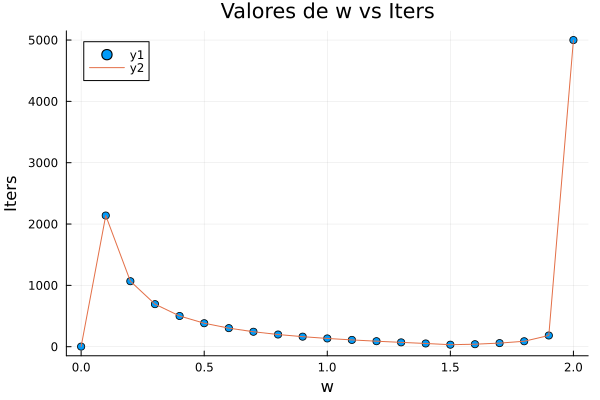

In [174]:
scatter(w_values,iters_values, xlabel = "w", ylabel = "Iters",title = "Valores de w vs Iters")
plot!(w_values,iters_values, xlabel = "w", ylabel = "Iters")

De donde se observa que se tiene mejores resultados para $w=1.5$

In [194]:
w = 1.5
x,y,U, iters, error = SOR(fa, fb, fc, fd, a, b, c, d, nx,ny, f, maxiter, tol,w)
print()

Tabla de valores

In [176]:
display(U)

11×6 Matrix{Float64}:
 1.0      0.921061  0.696707  0.362358  -0.0291995  -0.416147
 1.19867  1.12084   0.896692  0.562036   0.169935   -0.217478
 1.38942  1.31237   1.08844   0.753593   0.361101   -0.0267285
 1.56464  1.48812   1.26437   0.92942    0.536657    0.148496
 1.71736  1.64116   1.41753   1.08252    0.689595    0.301209
 1.84147  1.76541   1.54183   1.20681    0.813815    0.425324
 1.93204  1.85592   1.63231   1.29731    0.904357    0.515892
 1.98545  1.90907   1.68536   1.35041    0.957602    0.569303
 1.99957  1.92268   1.6988    1.36396    0.971416    0.583427
 1.97385  1.89614   1.67202   1.33737    0.945236    0.557701
 1.9093   1.83036   1.606     1.27166    0.880098    0.493151

Número de iteraciones y el error obtenido

In [162]:
println("Nḿero de iteraciones: $iter")
println("Error: $error")

Nḿero de iteraciones: 33
Error: 4.961899335853559e-9


Graficando la solución aproximada

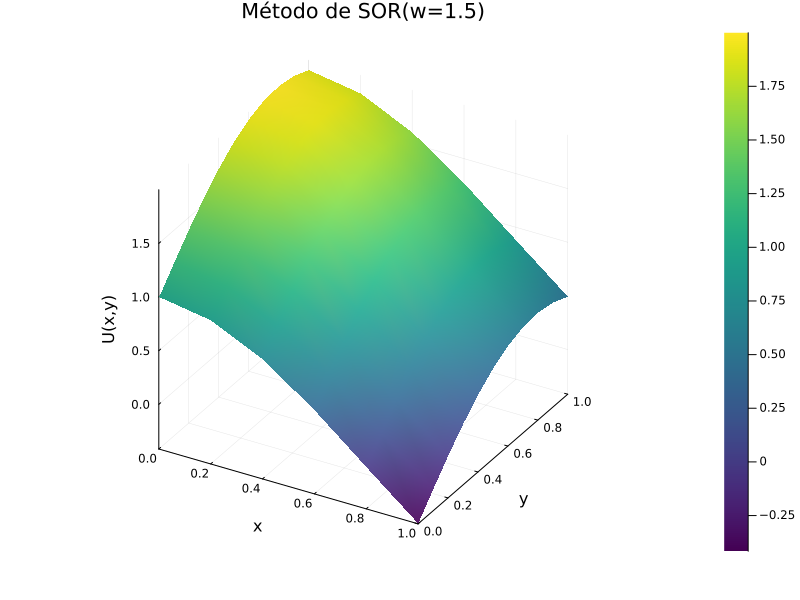

In [163]:
surface(x,y, U, 
        size=(800,600), 
        c=:viridis, 
        title="Método de SOR(w=1.5)",
        xlabel="x",
        ylabel="y",
        zlabel="U(x,y)")

## Comprobando con la solución real

$$U(x,y) = sin(2y) + cos(2x)$$

Definiendo $x$, $y$ y $F(x,y)$ como la solución verdadera.

In [177]:
x = LinRange(0,1,6)
y = LinRange(0,1,11)
F(x,y) = sin(2*y) + cos(2*x)
display(x)
display(y)
display(F)

6-element LinRange{Float64, Int64}:
 0.0, 0.2, 0.4, 0.6, 0.8, 1.0

11-element LinRange{Float64, Int64}:
 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0

F (generic function with 1 method)

Llenando los valores de U con los valores reales

In [192]:
P = zeros(ny+1,nx+1)

11×6 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

In [193]:
for j in 1:ny+1
    for i in 1:nx+1
        P[j,i] = F(x[i],y[j])
    end
end

Mostrando la tabla de valores de la solución real

In [189]:
display(P)

11×6 Matrix{Float64}:
 1.0      0.921061  0.696707  0.362358  -0.0291995  -0.416147
 1.19867  1.11973   0.895376  0.561027   0.16947    -0.217478
 1.38942  1.31048   1.08613   0.751776   0.360219   -0.0267285
 1.56464  1.4857    1.26135   0.927      0.535443    0.148496
 1.71736  1.63842   1.41406   1.07971    0.688157    0.301209
 1.84147  1.76253   1.53818   1.20383    0.812271    0.425324
 1.93204  1.8531    1.62875   1.2944     0.90284     0.515892
 1.98545  1.90651   1.68216   1.34781    0.95625     0.569303
 1.99957  1.92063   1.69628   1.36193    0.970374    0.583427
 1.97385  1.89491   1.67055   1.33621    0.944648    0.557701
 1.9093   1.83036   1.606     1.27166    0.880098    0.493151

Se observa claramente que los valores de la solución exacto coinciden con los valores de la solución aproximada.

Graficando la solución real.

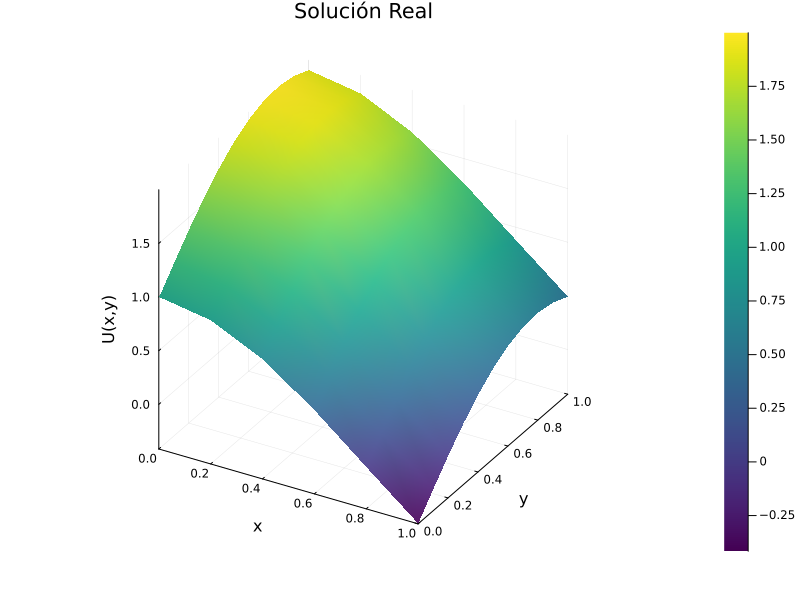

In [190]:
surface(x,y,P,size=(800,600), 
c=:viridis, 
title="Solución Real",
xlabel="x",
ylabel="y",
zlabel="U(x,y)")

In [197]:
abs.(P-U)

11×6 Matrix{Float64}:
 0.0  0.0         0.0         0.0         0.0          0.0
 0.0  0.00111116  0.00131568  0.00100867  0.000465519  0.0
 0.0  0.00188946  0.00231055  0.00181733  0.000882042  0.0
 0.0  0.00241881  0.00302012  0.00241974  0.00121361   0.0
 0.0  0.00274197  0.00346453  0.00280939  0.00143881   0.0
 0.0  0.00287617  0.00364966  0.00297777  0.00154348   0.0
 0.0  0.00282032  0.0035685   0.00291336  0.00151716   0.0
 0.0  0.00255697  0.00320173  0.00260135  0.00135177   0.0
 0.0  0.00204955  0.00251735  0.00202413  0.00104212   0.0
 0.0  0.00123386  0.00146984  0.00116283  0.000588217  0.0
 0.0  0.0         0.0         0.0         0.0          0.0